In [5]:
# https://www.kaggle.com/code/pasqualebalsebre/a-ml-analysis-of-california-housing-data/notebook

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# load dataFrame
data = pd.read_csv("data/housing.csv")
# Convert Categorical Data Values to Features
data = pd.get_dummies(data=data, columns=["ocean_proximity"], prefix="ocean_proximity")
# Fill the NAN value with the intermediate value
data.fillna(data.mean(), inplace=True)

# Independent columns
X = data.iloc[:, data.columns != "median_house_value"]
# target column (median_house_value)
Y = data.iloc[:, 8]

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [7]:
# Get correlations of each features in dataset
size = len(data.columns)
corr_mat = data.corr()
top_corr_features = corr_mat.index

# Listed features correlation with median_house_value (sorted by correlation)
corr_mat.sort_values(ascending=False, by='median_house_value').median_house_value

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

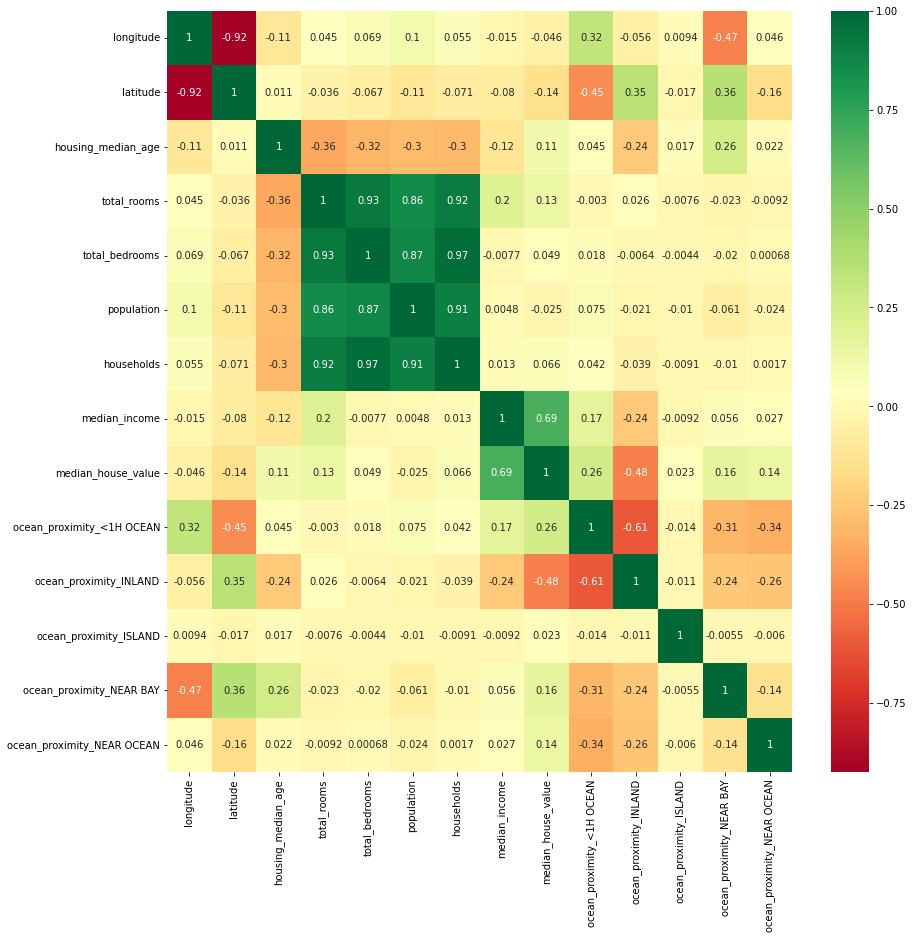

In [8]:
# Plot heat map
plt.figure(figsize=(size, size))
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")